In [966]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


In [967]:
# Import all the libraries which will be used in the exploration process
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#from geopy.extra.rate_limiter import RateLimiter
#from geopy.geocoders import Nominatim
import tqdm
from datetime import datetime
import datetime as dt 
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
from uszipcode import Zipcode

import plotly.express as px
import econtools
import econtools.metrics as mt
import geopandas as gp
from shapely import wkt

import plotly.graph_objs as go
import plotly

import plotly.express as px
import plotly.offline as offline

from plotly.graph_objs import *

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from rdd import rdd




In [968]:
crime_data = pd.read_csv('/Users/allenhardiman/Box/PHD Courses/Data/crime_zip.csv')
crime_data['date'] = pd.to_datetime(crime_data.date)

In [969]:
Number_crimes = crime_data['primary_type'].value_counts()
values = Number_crimes.values
categories = pd.DataFrame(data=Number_crimes.index, columns=["primary_type"])
categories['values'] = values


In [970]:
def treemap(categories,title,path,values):
    fig = px.treemap(categories, path=path, values=values, height=800,
                 title=title, color_discrete_sequence = px.colors.sequential.RdBu)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [971]:
treemap(categories,'Major Crimes in Chicago during Covid-19 era',['primary_type'],categories['values'])

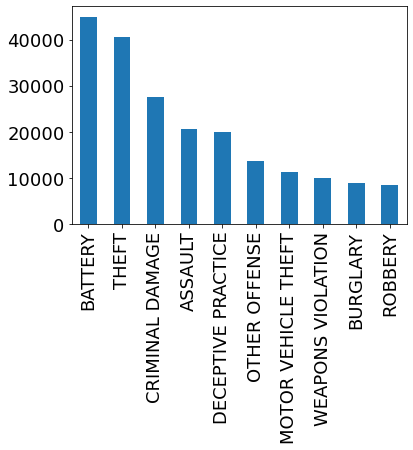

In [972]:
crime_data['primary_type'].value_counts(sort=True).nlargest(10).plot.bar()
plt.savefig('/Users/allenhardiman/Box/PHD Courses/ACE_592/Figures/commoncrime2.png', dpi=200)

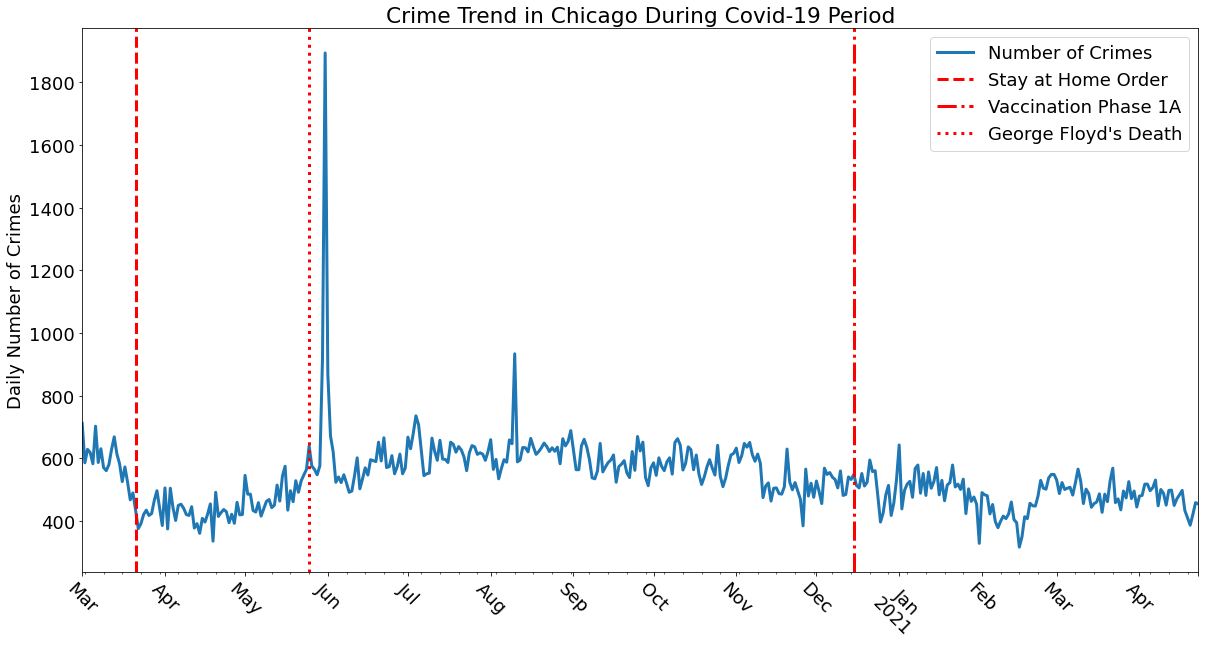

In [973]:
font = {'family' : 'normal',
        'weight': "normal",
        'size'   : 18}

plt.rc('font', **font)


crime_data.date.value_counts().sort_index().plot(label="Number of Crimes",figsize=(20,10),lw=3)
plt.xticks(rotation=-45)

plt.axvline(x="2020-03-21",ls="--",color="red",label="Stay at Home Order",lw=3)
plt.axvline(x="2020-12-15",ls="-.",color="red",label="Vaccination Phase 1A",lw=3)
plt.axvline(x="2020-05-25",ls=":",color="red",label="George Floyd's Death",lw=3)




plt.ylabel("Daily Number of Crimes")
plt.legend(loc="upper right")
plt.title('Crime Trend in Chicago During Covid-19 Period')
plt.savefig('/Users/allenhardiman/Box/PHD Courses/ACE_592/Figures/Crimetrend.png')

### Districts with the most crimes



In [974]:
districts_count = crime_data.district.value_counts()
districts_count.head()

11.0    15918
6.0     15335
8.0     14172
4.0     13518
7.0     12594
Name: district, dtype: int64

### Districts with the most arrests


In [975]:
districts_arrests=crime_data[(crime_data['arrest'] == True )]
districts_count = districts_arrests.district.value_counts()
districts_count.head()

11.0    4512
6.0     2599
7.0     2308
10.0    2064
25.0    1827
Name: district, dtype: int64

In [976]:
domestic_crimes = crime_data[(crime_data['domestic'] == True )]
domestic_crimes['count'] = 1 
homicides = crime_data[(crime_data['primary_type'] == "HOMICIDE" )]
homicides['count'] = 1 
districts_arrests['count'] = 1 

<ipython-input-976-3a6833434793>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-976-3a6833434793>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-976-3a6833434793>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### We construct the count values and the moving average for homicides, domestic crimes and arrests

In [977]:
homicides_collapsed = homicides.groupby('date').sum() 
domestic_collapsed = domestic_crimes.groupby('date').sum() 
arrests_collapsed = districts_arrests.groupby('date').sum() 

homicides_collapsed['rolling_homicides'] = homicides_collapsed['count'].rolling(window=7).mean()
domestic_collapsed['rolling_domestic'] = domestic_collapsed['count'].rolling(window=7).mean()
arrests_collapsed['rolling_arrests'] = arrests_collapsed['count'].rolling(window=7).mean()


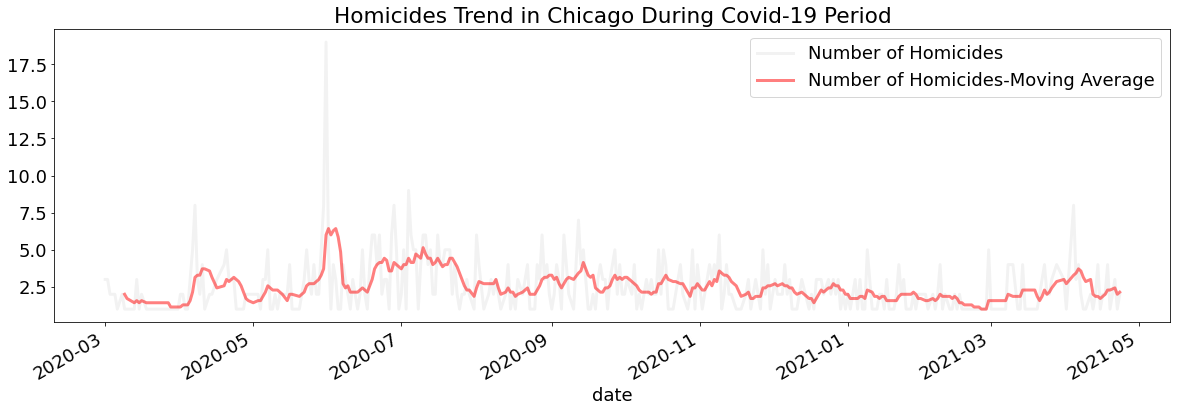

In [978]:
f,a  = plt.subplots(figsize=(20,6))

#covidcrime['count'].plot(ax=a,label="Crime Number")
homicides_collapsed['count'].plot(alpha=0.05,ax=a,color="black",label="Number of Homicides",lw=3)
homicides_collapsed['rolling_homicides'].plot(alpha=0.5,ax=a,color="red",label="Number of Homicides-Moving Average",lw=3)
plt.legend(loc='upper right')
plt.title('Homicides Trend in Chicago During Covid-19 Period')
#a.set_ylim(-1,1)
plt.savefig('/Users/allenhardiman/Box/PHD Courses/ACE_592/Figures/homirollavg.png')

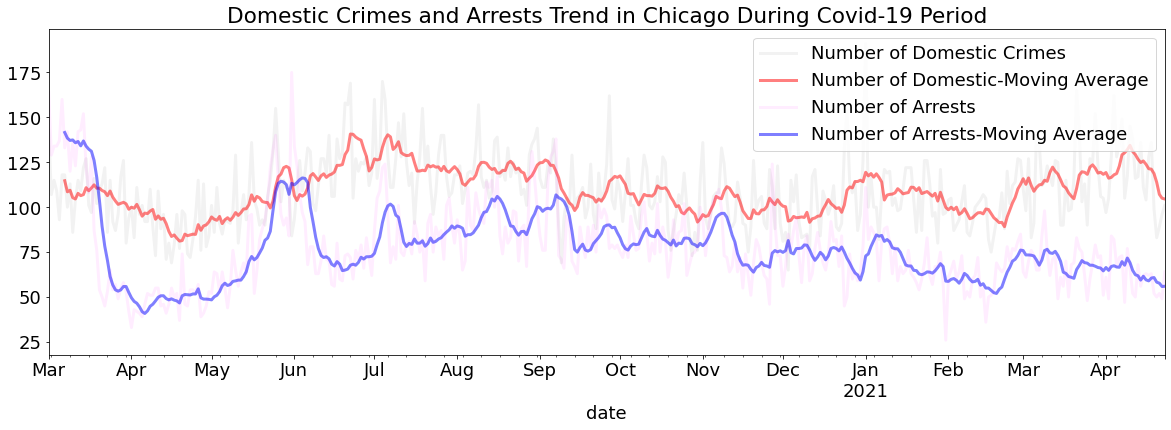

In [979]:
f,a  = plt.subplots(figsize=(20,6))

#covidcrime['count'].plot(ax=a,label="Crime Number")

domestic_collapsed['count'].plot(alpha=0.05,ax=a,color="black",label="Number of Domestic Crimes",lw=3)
domestic_collapsed['rolling_domestic'].plot(alpha=0.5,ax=a,color="red",label="Number of Domestic-Moving Average",lw=3)

arrests_collapsed['count'].plot(alpha=0.07,ax=a,color="magenta",label="Number of Arrests",lw=3)
arrests_collapsed['rolling_arrests'].plot(alpha=0.5,ax=a,color="blue",label="Number of Arrests-Moving Average",lw=3)

plt.legend(loc='upper right')
#a.set_ylim(-1,1)
plt.title('Domestic Crimes and Arrests Trend in Chicago During Covid-19 Period')
plt.savefig('/Users/allenhardiman/Box/PHD Courses/ACE_592/Figures/domarrestrollingavg.png')

# Cleaning Covid Data

In [980]:
covid_case=pd.read_csv("/Users/allenhardiman/Box/PHD Courses/Data/COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv")

In [981]:
covid_case1 = covid_case[['Week End','ZIP Code','Cases - Weekly']]
covid_case1=covid_case1.rename(columns={'Week End':'date', 'ZIP Code':'zipcode', 'Cases - Weekly':'cases'})
covid_case1['date'] = pd.to_datetime(covid_case1.date).astype('datetime64[ns]')
covid_case1=covid_case1[covid_case1['zipcode']!='Unknown']
covid_average=covid_case1.groupby('date').sum().reset_index()

In [982]:
covid_zip=covid_case1['zipcode']
covid_zip=covid_zip.astype(int)
covid_zip=covid_zip.drop_duplicates()
covid_zip=pd.DataFrame(covid_zip)

# Heatmap for Covid & Crime Cases

In [983]:
chicago=gp.read_file('/Users/allenhardiman/Dropbox/PHD Courses/Data/geo_export_1c64fcdd-5138-4979-a9f9-55db9817f253.shp')

crime_gdf=gp.GeoDataFrame(crime_data, geometry=gp.points_from_xy(crime_data.longitude_x, crime_data.latitude_x))
#gdf = geopandas.GeoDataFrame(
    #df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
crime_gdf=crime_gdf.drop(columns=['latitude_x','latitude_y','longitude_x','longitude_y'])    
crime_gdf=crime_gdf.set_crs(epsg=4326)

In [984]:
crime_gdf.crs==chicago.crs

True

In [985]:
chicago=chicago.rename(columns={'zip':'zipcode'})
chicago['zipcode']=chicago['zipcode'].astype(int)

In [986]:
crime_clip=gp.clip(crime_gdf,chicago)

In [987]:
chicago_crime = gp.sjoin(crime_clip,\
                                chicago,\
                                how='right')
#zipcode_y (that comes from the chicago shapefile) is more accurate, so use it

In [988]:
chicago_crime_counts = chicago_crime.groupby("zipcode_y")['primary_type'].count().reset_index()
chicago_crime_counts=chicago_crime_counts.rename(columns={'zipcode_y':'zipcode'})
chicago_crime1=chicago.merge(chicago_crime_counts, how='left')

In [989]:
covid_case2=covid_case[['ZIP Code', 'Week End', 'Cases - Weekly', 'ZIP Code Location']]

covid_case2['location']=gp.GeoSeries.from_wkt(covid_case2['ZIP Code Location'])
covid_case2=covid_case2.rename(columns={'Week End':'date', 'ZIP Code':'zipcode', 'Cases - Weekly':'cases'})
covid_case2=covid_case2.drop(columns={'ZIP Code Location'})

<ipython-input-989-46b28eda4aa8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [990]:
covid_gdf=gp.GeoDataFrame(covid_case2, geometry='location')
covid_gdf=covid_gdf.set_crs(epsg=4326)

In [991]:
covid_clip=gp.clip(covid_gdf,chicago)

In [992]:
chicago_covid = gp.sjoin(covid_clip,\
                                chicago,\
                                how='right')

In [993]:
chicago_covid=chicago_covid.rename(columns={'zipcode_y':'zipcode'})
chicago_covid_counts=chicago_covid.groupby('zipcode')['cases'].sum().reset_index()
chicago_covid1=chicago.merge(chicago_covid_counts, how='left')

In [994]:
chicago_covid1.sort_values('cases',ascending=False) #Looking at zipcodes with most covid cases


,objectid,shape_area,shape_len,zipcode,geometry,cases
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757...",16922.0
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922...",14265.0
55,56.0,2.117553e+08,63253.238669,60632,"POLYGON ((-87.69479 41.83008, -87.69472 41.830...",13158.0
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830...",10733.0
51,52.0,1.940626e+08,77647.318007,60634,"POLYGON ((-87.76625 41.93128, -87.76661 41.931...",10187.0
...,...,...,...,...,...,...
33,19.0,4.560229e+06,13672.682289,60603,"POLYGON ((-87.61633 41.88211, -87.61635 41.882...",74.0
37,23.0,2.820851e+08,101876.553747,60666,"MULTIPOLYGON (((-87.89598 42.00578, -87.89598 ...",0.0
46,44.0,4.855133e+07,28833.963757,60827,"POLYGON ((-87.58479 41.64470, -87.58567 41.644...",0.0
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909...",0.0


In [995]:
chicago_crime1.sort_values('primary_type', ascending=False) #Zipcodes with most crime cases

,objectid,shape_area,shape_len,zipcode,geometry,primary_type
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721...",11105
18,43.0,3.452417e+08,83748.991990,60628,"POLYGON ((-87.58515 41.72160, -87.58518 41.721...",10323
60,61.0,1.678720e+08,53040.907078,60619,"POLYGON ((-87.58592 41.75150, -87.58592 41.751...",10204
29,17.0,9.941812e+07,40394.410008,60624,"POLYGON ((-87.70567 41.86641, -87.70588 41.866...",10055
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830...",9093
...,...,...,...,...,...,...
44,30.0,9.357756e+06,13132.565490,60661,"POLYGON ((-87.63997 41.88905, -87.63999 41.888...",570
25,14.0,1.875267e+08,59703.215815,60633,"POLYGON ((-87.60045 41.67432, -87.58363 41.673...",570
45,31.0,6.766411e+06,12040.440235,60606,"POLYGON ((-87.63397 41.88753, -87.63397 41.887...",522
33,19.0,4.560229e+06,13672.682289,60603,"POLYGON ((-87.61633 41.88211, -87.61635 41.882...",458


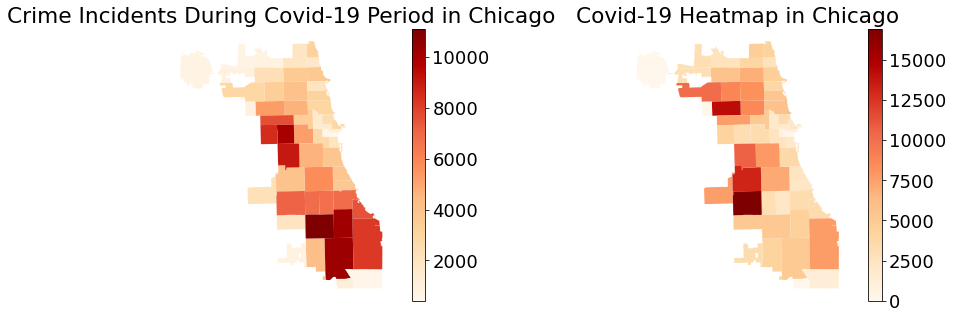

In [996]:
fig, a = plt.subplots(ncols=2, figsize=(15,5))
#= plt.subplots(1,1, figsize=(12,7))
chicago_crime1.plot(column="primary_type",
             ax=a[0],
             cmap="OrRd",
            legend=True);
chicago_covid1.plot(column="cases",
             ax=a[1],
             cmap="OrRd",
            legend=True);
a[0].set_title("Crime Incidents During Covid-19 Period in Chicago");
a[1].set_title("Covid-19 Heatmap in Chicago");
a[1].axis("off")
a[0].axis("off")

plt.savefig('/Users/allenhardiman/Box/PHD Courses/ACE_592/Figures/Covidcrimecombheat.png')



# Regression Crime And Covid

In [997]:
crime_merge1=pd.merge(crime_data,covid_zip, on='zipcode', how='inner', validate='m:1')
crime_merge1['week']=crime_merge1['date'].dt.to_period('W-Sat')
crime_merge1['week']=crime_merge1['week'].astype(str)
crime_merge1['week']=crime_merge1['week'].apply(lambda x:  str(x)[11:])
crime_merge1['week']=pd.to_datetime(crime_merge1.week)
del crime_merge1['date']
crime_merge1=crime_merge1.rename(columns={'week':'date'})
crime_merge1['zipcode']=crime_merge1['zipcode'].astype(str)
#crime_covid1['count'] = 1 
crime_merge1=crime_merge1.groupby(['zipcode','date'])['primary_type'].count().reset_index()
crime_covid1=pd.merge(crime_merge1, covid_case1, on=['zipcode','date'], how='inner')
crime_covid1 = crime_covid1.dropna()




#crime_merge1.sort_values('week')
#crime_merge1 = crime_merge1.groupby(['zipcode','week'])['primary_type'].count()
#crime_merge1=pd.DataFrame(crime_merge1)
#crime_me


#crime_covid1['primary_type'].corr(crime_covid1['cases'])


crime_covid2=crime_covid1[crime_covid1['cases']!=0]
crime_covid2['logcase']=np.log(crime_covid2['cases'])
crime_covid2['logcrime']=np.log(crime_covid2['primary_type'])


<ipython-input-997-35c3c86ea211>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-997-35c3c86ea211>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [998]:
y = 'logcrime'
X = ['logcase']
fe_var = 'zipcode'
cluster_var = 'zipcode'

results = mt.reg(
    crime_covid2,                     # DataFrame
    y,                      # Dependent var (string)
    X,                      # Independent var(s) (string or list of strings)
    fe_name=fe_var,         # Fixed-effects/absorb var (string)
    cluster=cluster_var,
    addcons=True,
)

print(results)



Dependent variable:	logcrime
N:			3283
R-squared:		0.9123
Estimation method:	OLS
VCE method:		Cluster
  Cluster variable:	  zipcode
  No. of clusters:	  58
Fixed effects by:	zipcode
  No. of FE:		  58
         coeff    se      t   p>t CI_low CI_high
logcase -0.007 0.010 -0.677 0.501 -0.028   0.014



# Comparison to Before Covid-19 Period

# Total Crime

In [999]:
crime_total=crime_data2.groupby('date')['primary_type'].count()
crime_total=pd.DataFrame(crime_total)
crime_total['rolling_crime']=crime_total['primary_type'].rolling(window=7).mean()

In [1000]:
fig = px.line(crime_total, x= crime_total.index, y= 'rolling_crime',
             labels={
                     "rolling_crime": "7-Day Rolling Average Total Crime",
                    },
                title="Comparison of Total Number of Crime Pre and Post Covid-19 Era")
fig = fig.add_shape(type="line",x0= covid_start, y0=0, x1=covid_start, y1=1000,line=dict(color="purple",width=3, dash = 'dashdot'))
fig.show()
fig.write_image('/Users/allenhardiman/Box/PHD Courses/ACE_592/Figures/Prepostcrime.png')

# Domestic Crimes

In [1001]:
domestic_crimes2 = crime_data2[(crime_data2['domestic'] == True )]
domestic_crimes2['count'] = 1 
domestic_sum=domestic_crimes2.groupby('date').sum() 
domestic_sum['rolling_domestic'] = domestic_sum['count'].rolling(window=7).mean()

<ipython-input-1001-a279ecf0a5b9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1002]:
fig = px.line(domestic_sum, x= domestic_sum.index, y= 'rolling_domestic',
             labels={
                     "rolling_domestic": "7-Day Rolling Average Domestic-Related Crime",
                    },
                title="Comparison of Domestic-Related Crime Pre and Post Covid-19 Era")
fig = fig.add_shape(type="line",x0= covid_start, y0=0, x1=covid_start, y1=200,line=dict(color="purple",width=3, dash = 'dashdot'))
fig.show()
fig.write_image('/Users/allenhardiman/Box/PHD Courses/ACE_592/Figures/Prepostdomestic.png')


# Homicides Crime

In [1003]:
homicides_crime = crime_data2[(crime_data2['primary_type'] == 'HOMICIDE' )]
homicides_crime['count'] = 1
homicides_sum=homicides_crime.groupby('date').sum() 
homicides_sum['rolling_homicides'] = homicides_sum['count'].rolling(window=7).mean()

<ipython-input-1003-ad89bc442a52>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1004]:
fig = px.line(homicides_sum, x= homicides_sum.index, y= 'rolling_homicides',
             labels={
                     "rolling_homicides": "7-Day Rolling Average Homicides Crime",
                    },
             title="Comparison of Homicides Crime Pre and Post Covid-19 Era")
fig = fig.add_shape(type="line",x0= covid_start, y0=0, x1=covid_start, y1=10,line=dict(color="purple",width=3, dash = 'dashdot'))
fig.show()
fig.write_image('/Users/allenhardiman/Box/PHD Courses/ACE_592/Figures/Preposthomicides.png')